In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology
from skimage.measure import label
from skimage import color
from skimage.measure import regionprops

In [125]:
image = plt.imread('balls_and_rects.png')

In [126]:
image_c = color.rgb2hsv(image)

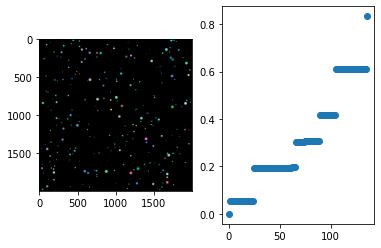

In [127]:
plt.figure()
plt.subplot(121)
plt.imshow(image_c)
plt.subplot(122)
plt.plot(np.unique(image_c[:,:,0]),'o')
plt.show()

In [148]:
def det_color(hsv):
  unique = np.unique(hsv[:,:,0])
  diff = np.diff(unique).mean()/2
  plt.plot(np.diff(unique))
  plt.show()
  vals = []
  color = [unique[0]]

  for i in range(0,len(unique)-1):
    if np.abs(unique[i] - unique[i+1]) < diff:
      color.append(unique[i])
    else:
      color.append(unique[i])
      vals.append(np.array(color).mean())
      color = []

  if len(color) > 0:
    vals.append(np.array(color).mean())
  elif np.abs(unique[-2] - unique[-1]) > diff:
    vals.append(unique[-1])

  if vals[0] == 0:
    del vals[0]
    
  return vals

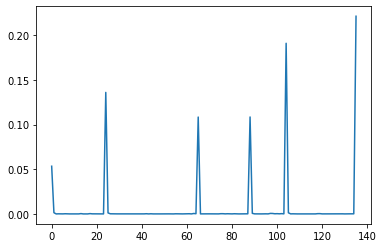

In [149]:
colors = det_color(image_c)

In [150]:
print(colors)

[0.05532824, 0.19447353, 0.3057229, 0.41655862, 0.6111331, 0.8333333]


In [151]:
c_img = np.zeros((10,len(colors)*10))

In [152]:
for c in range(len(colors)):
  c_img[:,c*10:c*10+10] = colors[c]

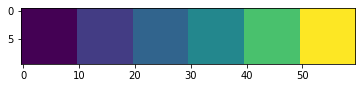

In [153]:
plt.imshow(c_img)

In [154]:
gray = np.mean(image_c,2)

In [155]:
binary = gray.copy()
binary[binary>0] = 1

In [156]:
labeled = label(binary)

In [157]:
print(np.max(labeled))

257


In [158]:
regions = regionprops(labeled)

In [159]:
rects = {color: 0 for color in colors}
balls = {color: 0 for color in colors}

In [160]:
unique = np.unique(image_c[:,:,0])
diff = np.diff(unique).mean()/2

for region in regions:
  if region.extent == 1:
    figs = rects
  else:
    figs = balls

  centroid = region.centroid
  r_color = image_c[int(centroid[0]),int(centroid[1]),0]
  for c in colors:
    if np.abs(r_color - c) < diff:
      figs[c] += 1
      break

In [161]:
print('Total number of figures:', np.max(labeled))
rects_num = sum(list(rects.values()))
balls_num = sum(list(balls.values()))
print('Total number of figures found:', rects_num+balls_num)
print()
print('Balls found: ',balls_num)
color_id = 1
for color in balls:
  print(f'Color type {color_id}: {balls[color]}')
  color_id+=1
print('Rectangles found: ', rects_num)
color_id = 1
for color in rects:
  print(f'Color type {color_id}: {rects[color]}')
  color_id+=1

Total number of figures: 257
Total number of figures found: 257

Balls found:  122
Color type 1: 17
Color type 2: 19
Color type 3: 12
Color type 4: 22
Color type 5: 29
Color type 6: 23
Rectangles found:  135
Color type 1: 22
Color type 2: 32
Color type 3: 17
Color type 4: 22
Color type 5: 29
Color type 6: 13
